# Introducción a la Ciencia de los Datos, CIDE (Profesor Gonzalo Castañeda)
## P11. Machine Learning con Python
## Basado en: Klein, Bernd. april, 2022.  “Python-course.eu” Tutorial: Machine Learning with Python,
## https://python-course.eu/machine-learning/ 

### Cap. 4-7

## (1) La base de Datos de Iris

In [1]:
# Atributos:  longitud y amplitud en centímetros de pétalos y sépalos
# Clases: Iris Setosa; Iris Versicolor; Iris Virginica

In [2]:
# Disponible en la base de datos de la librería de Python para Machine Learning: sklearn

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)               # La base de datos existe en un objeto (bunch) similar a un diccionario

sklearn.utils.Bunch

In [4]:
iris.keys()                # Información disponible        

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris["target_names"])        # las keys tienen un nombre con el que se pueden acceder 
print(iris.target_names)           # esta es otra forma de hacerlo

['setosa' 'versicolor' 'virginica']
['setosa' 'versicolor' 'virginica']


In [6]:
n_samples, n_features = iris.data.shape     # Los atributos estan almacenados en la key = data 
print('Number of samples:', n_samples)      # El tamaño de la data: observaciones x atributos
print('Number of features:', n_features)
# Podemos obtener los atributos: sepal length, sepal width, petal length, y  petal width
# para las distintas observaciones de la base 
print(iris.data[0])  # Para la primera flor, los atrubutos aparecen en un arreglo uni-dimensional

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


In [7]:
# Flores almacenadas en las posiciones  12, 26, 89, y 114
iris.data[[12, 26, 89, 114]]       # Renglones son observaciones, Columnas son los atributos

array([[4.8, 3. , 1.4, 0.1],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 2.5, 4. , 1.3],
       [5.8, 2.8, 5.1, 2.4]])

### Naturaleza de los datos  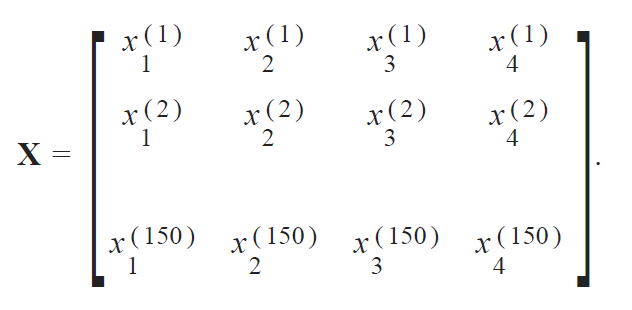

In [8]:
print(iris.data.shape)
print(iris.target.shape)     # Las etiquetas se almacenan en target
print(iris.target)           # Los números corresponden a las etiquetas de cada observación

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
import numpy as np
np.bincount(iris.target)    # Si queremos saber cuantas etiquetas hay de cada tipo de Iris

array([50, 50, 50])

In [10]:
print(iris.target_names)    # Para saber la correspondencia entre números y tipo [0, 1, 2]

['setosa' 'versicolor' 'virginica']


In [11]:
# Si queremos visualizar los atributos de las primeras 5 flores del tipo 1
print(iris.data[iris.target==1][:5])                                           

[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]


## (2) Histogramas  y diagramas de dispersión de los atributos

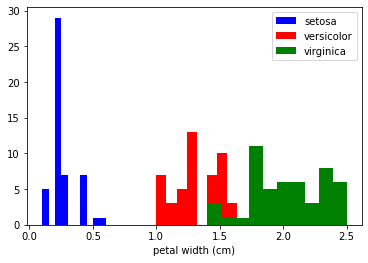

In [12]:
# Primero los histogramas
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_index = 3                                            # Número del atributo a estudiar
colors = ['blue', 'red', 'green']                      # Se va asignar un color a cada etiqueta

for label, color in zip(range(len(iris.target_names)), colors):  # iteramos sobre las etiquetas
    ax.hist(iris.data[iris.target==label, x_index],  # Un histograma para c/etiqueta
            label=iris.target_names[label],      # En la leyenda van los nombres de las etiquetas
            color=color)

ax.set_xlabel(iris.feature_names[x_index]) # En el eje de las Xs va el nombre de 3er atributo
ax.legend(loc='upper right')               # Posición de la leyenda
# plt.show()                               # No es necesario en el Notebook

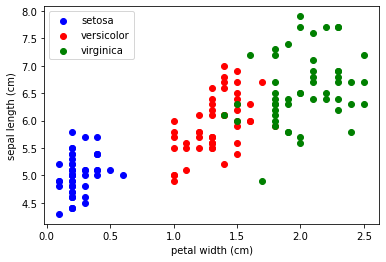

In [13]:
# Queremos ahora graficar dos atributos 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

x_index = 3                            # Número de atributo seleccionado para el eje x
y_index = 0                            # Número de atributo seleccionado para el eje y

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    ax.scatter(iris.data[iris.target==label, x_index],  # En este caso: un diagrama de dispersión
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.legend(loc='upper left')
# plt.show()
# Notar que cada tipo de flor (etiqueta) si presenta atributos particulares

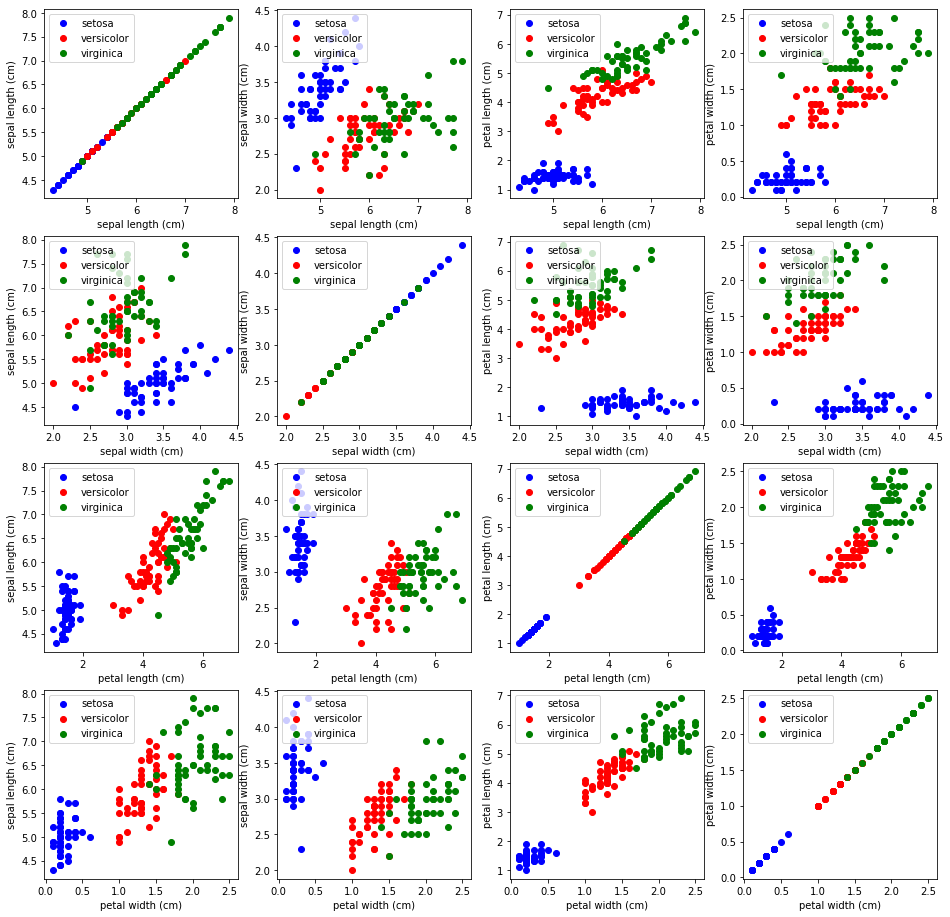

In [14]:
# veamos ahora todas las combinaciones de diagramas
import matplotlib.pyplot as plt

n = len(iris.feature_names)                                    # Número de atributos disponibles
fig, ax = plt.subplots(n, n, figsize=(16, 16))                 # Número de paneles en el diagrama

colors = ['blue', 'red', 'green']

for x in range(n):                                             # Iteramos los dos atributos
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x], 
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show()
# La Setosa parece tener atributos muy diferentes

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

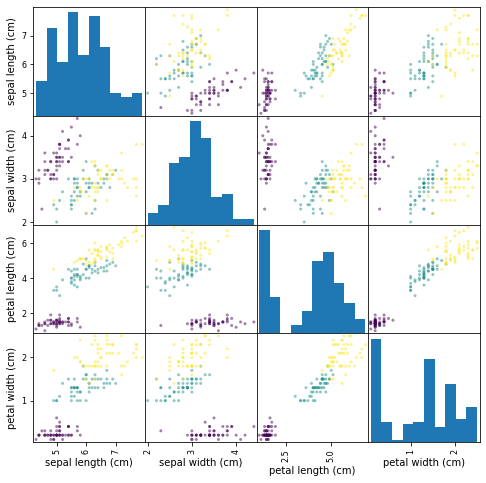

In [15]:
# Si se trabaja con Pandas el análisis visual se facilita con scatterplot_matrix
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Hacemos un data frame 
                                                               # con los atributos como columnas
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8))  
# Las etiquetas presentan colores diferentes 

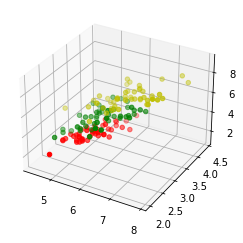

In [16]:
# Cómo se vería una visualización en tres dimensiones
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D        # Librería de Python para hacer tres dimensiones
iris = load_iris()
X = []
for iclass in range(3):
    X.append([[], [], []])                  # En este listado creo sublistados para cada atributo
    for i in range(len(iris.data)):
        if iris.target[i] == iclass:           # Analizo c/observación a qué etiqueta pertenece
            X[iclass][0].append(iris.data[i][0])   # Definimos cada uno de los atributos
            X[iclass][1].append(iris.data[i][1])
            X[iclass][2].append(sum(iris.data[i][2:])) # Notar que el último atributo es realidad
                                                       # una suma de los dos últimos

colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for iclass in range(3):
    ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()


## (3) Bases de datos disponibles en sklearn

In [17]:
from sklearn import datasets     # Algunas de estas bases son muy grandes, conviene
                                 # trabajarlas por separado

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()                      # Base de datos con imágenes de dígitos

In [19]:
digits.keys()                    # Veamos que tiene la misma estructura que Iris

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))              # Tiene muchas observaciones y 64 atributos 

(1797, 64)


In [21]:
print(digits.data[0])                 # Imprimimos primera observación (atributos = N. enteros)
print(digits.target)                  # Vemos cuantas etiquetas existen (10 dígitos) 

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [22]:
# En realidad cada atributo es una representación de una coordenada en un arreglo de Numpy de 2
# dimensiones (i.e., fracción de una imagen)
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


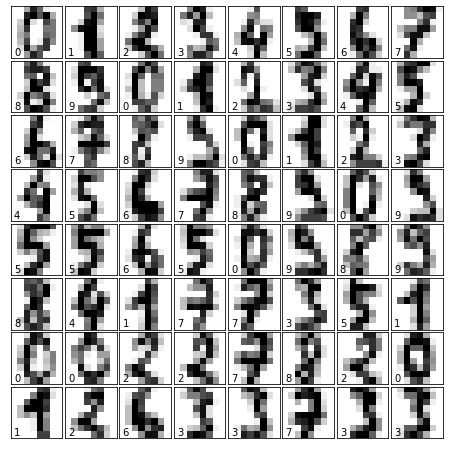

In [23]:
# Para que quede mas claro visualicemos el conjunto de imagenes digitalizadas
import matplotlib.pyplot as plt
# Establecemos el diagrama
fig = plt.figure(figsize=(6, 6))  # Tamaño de la figura en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Gráficas de los dígitos: notar que cada imagen se expresa en 8x8 pixeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiquetemos a la imagen con la clase de digíto
    ax.text(0, 7, str(digits.target[i]))

In [24]:
# para la descripción d ela base de datos usar
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [25]:
# Otra base de datos disponible: Caras

In [26]:
from sklearn.datasets import fetch_olivetti_faces    # la importamos y checamos sus keys
faces = fetch_olivetti_faces()
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [27]:
n_samples, n_features = faces.data.shape     # Dimensiones de la base
print((n_samples, n_features))

(400, 4096)


In [28]:
# Arreglos de Numpy para caracterizar las caras
import numpy as np
np.sqrt(4096)     # 64 x 64 pixeles de las imágenes

64.0

In [29]:
faces.images.shape

(400, 64, 64)

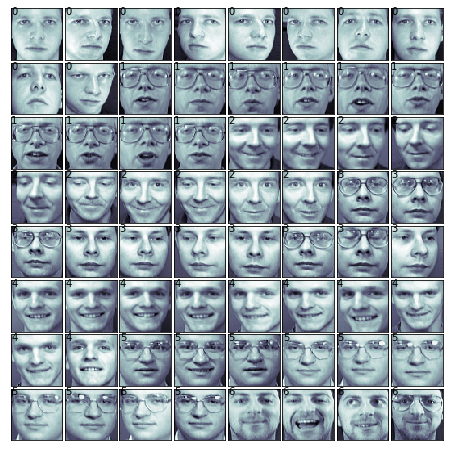

In [30]:
# Visualizamos la base de datos de las caras
fig = plt.figure(figsize=(6, 6))  # Tamaño de las figuras en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
    # Etiquetamos la figura con el valor numérico de la clase
    ax.text(0, 7, str(faces.target[i]))

## (4) Generación de datos sintéticos con Python

In [31]:
# Creación de datos artificiales del clima en ciudades alemanas
import numpy as np
import pandas as pd
cities = ['Berlin', 'Frankfurt', 'Hamburg',                # Listado de ciudades
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe'
         ]
n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),         # Tres atributos del clima
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)                 # el índice son las 12 ciudades
df

,Temperature,Humidity,Wind
Berlin,23.486677,77.668671,22.070662
Frankfurt,21.714799,78.815973,20.634516
Hamburg,23.105734,75.991737,13.094673
Nuremberg,21.110659,72.535510,10.687496
Munich,24.351395,76.375442,14.323621
Stuttgart,19.503325,78.714690,13.327262
Hanover,22.532898,78.162299,21.908650
Saarbruecken,22.132190,80.036037,10.926982
Cologne,27.694856,78.172752,12.237666
Constance,24.172693,79.925612,13.248357


In [32]:
# Con el método make_blobs creamos manchones de datos

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [34]:
n_classes = 4                                  # Especificamos las clases
data, labels = make_blobs(n_samples=1000,      # Creamos los manchones con 1,000 observaciones
                          centers=n_classes,   # Centros de c/clase creados al azar
                          random_state=100)

labels[:7]                                     # Mostrar las etiquetas de primeras 7 observaciones

array([1, 3, 1, 3, 1, 3, 2])

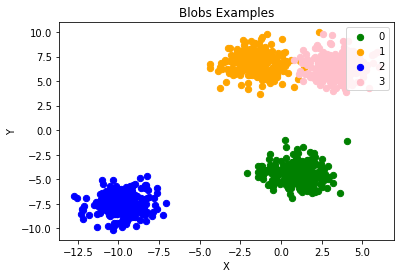

In [35]:
# Visualización de los manchones
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue', "pink")   # Asignamos colores a los manchones
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0],        # Graficamos cada punto con el color asociado a la clase
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

In [36]:
# Si queremos especificar las coordenadas de las clases de manera explícita
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2, 3], [4, 5], [7, 9]]                     # Coordenadas de cada clase
data, labels = make_blobs(n_samples=1000, 
                          centers=np.array(centers),
                          random_state=1)

labels[:7]

array([0, 1, 1, 0, 2, 2, 2])

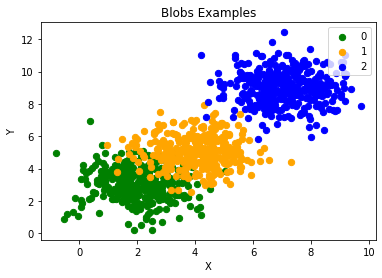

In [37]:
# Veamos como quedan los clústeres o manchones
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue')
for label in range(len(centers)):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

In [38]:
# Para guardar los datos en un archivo,

import numpy as np

labels = labels.reshape((labels.shape[0],1))      # Hacemos un vector de N x 1 con las etiquetas
all_data = np.concatenate((data, labels), axis=1) # Concatenamos las coordenadas con etiquetas
all_data[:7]                                      # vemos primeras ocho observaciones

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

In [39]:
# El proceso anterior en un ejemplo sencillo
import numpy as np

a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)

x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [40]:
# Guardamos el arreglo de Numpy en un archivo texto
np.savetxt("squirrels.txt", 
           all_data,
           fmt=['%.3f', '%.3f', '%1d'])     # Formato
all_data[:10]                                # Va a aparecer en el dashboard de Jupyter

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [41]:
# Leemos de nuevo el archivo y lo separamos entre datos y las etiquetas de las clases
file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]    # Todos los renglones,  sin incluir última columna
labels = file_data[:,2:]   # Todos los renglones de la columna 2 al final (i.e., una sola)

labels = labels.reshape((labels.shape[0]))
print(data)

[[1.724 4.229]
 [4.165 5.778]
 [4.514 4.983]
 ...
 [0.927 3.495]
 [2.286 3.885]
 [3.274 4.967]]


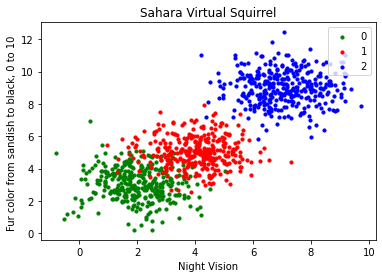

In [42]:
# vamos a interpretar y a graficar estos datos ficticios (ardilla del sahara)

import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')


ax.legend(loc='upper right')

In [43]:
# Una primera aplicación de aprendizaje supervisado con sklearn : 

In [44]:
# Dividimos las base de datos entre el 'training set' y el 'testing set'
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, 
                       labels, 
                       train_size=0.8,      # 80% de los datos van para el aprendizaje
                       test_size=0.2,
                       random_state=42       # garantiza el mismo resultado para cada corrida
                      )
# Separa y asigna etiquetas correspondientes
train_data, test_data, train_labels, test_labels = data_sets 

In [45]:
# Aplicamos el método de k-nearest neighborgh
from sklearn.neighbors import KNeighborsClassifier

# Se crea el modelo de clasificación con los ocho vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=8)

# Se realiza el proceso de aprendizaje         
knn.fit(train_data, train_labels)

# Se evalua con los datos de prueba  (predicciones para todos las observaciones)
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [46]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))  # Evaluamos predicciones

Accuracy: 0.97


### (5) Los procesos de aprendizaje y prueba del modelo

In [47]:
# Una de las características que diferencia a ML de la econometría, es que los modelos 
# identifican sus parámetros con una base de datos (training set), pero evalúan su capacidad 
# predictiva con datos diferentes (testing set)
# En este sentido se dice que el modelo prueba sus predicciones con datos disponibles, para
# estar listos una vez que surjan nuevos datos y se desconozca el resultado de cierto evento 
# (i.e, no vengan con una etiqueta)

In [48]:
# En Python no es necesario hacer la separacicón de datos para aprendizaje y prueba. Existen
# dos módulos que cumplen estas funciones: train_test_split   y model_selection

In [49]:
# Si los datos estan ordenados de acuerdo con las etiquetas, se tienen que revolver al azar
# antes de dividir las muestras para ser usadas en los procesos de aprendizaje y prueba

### Separación de muestras en dos conjuntos cuyos elementos son elegidos al azar
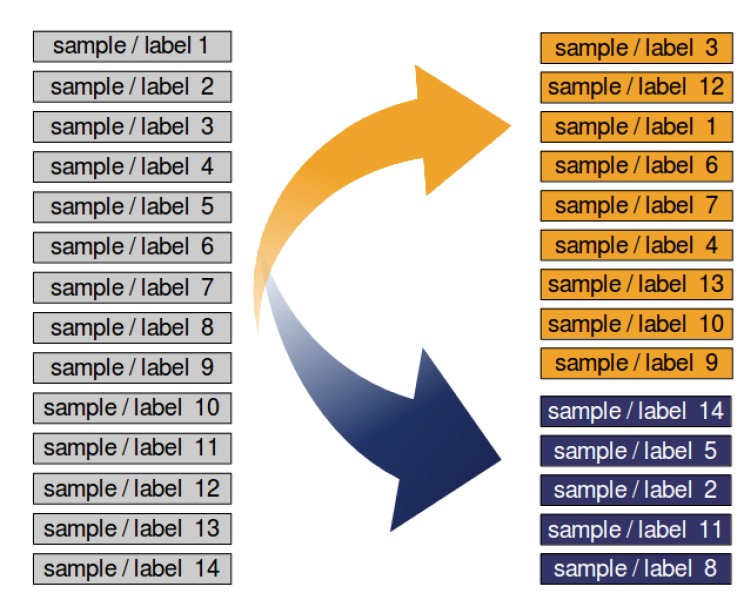

### Un ejemplo con los datos de Iris

In [50]:
# Las 150 instancias (observaciones) de Iris están divididas en 50 datos de cada
# variante, las que se presentan en la base de datos de manera ordenada

In [51]:
# Si los dividieramos como vienen en 2/3 para el aprendizaje y 1/3 para la prueba.
# El proceso de aprendizaje no tendría datos de la variante 2 = Virginica

In [52]:
# veamos las etiquetas de la base de datos
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
iris.target                     # Checar que vienen en orden

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
# Podríamos mover al azar las observaciones de la base de datos 
# Con una permutación aleatoria, a partir del N. de observaciones, creamos un índice
indices = np.random.permutation(len(iris.data))
indices

array([ 71,  48, 147,  44, 133,  36,  13,  75, 103, 138, 125, 123, 146,
        33, 121,   5,  27,  90, 105, 131,  73,  47,  56,  87,  17,  85,
       119,  31,  99,  42,  70, 127,  49, 148,  89,  46,  58,  12,   8,
        34,  35,   4, 143,   2, 128,  16,   6,  30,  68,  79,  21, 108,
       126,  74,  40,  59,  65,  94,  14, 140,  20,  78,  37, 110, 116,
        98,  77,  28,  25,  82, 106, 114, 135,  64,  57, 129,  22,  96,
       124,  88,  11,   7, 120, 142, 100,  93,   1,  92,  76,  29, 104,
       111,  63,  72, 117, 109,  91,  80,  69,  84,  66, 115,  60,   3,
        18,  97,  53,  45,  61,  10,  39, 132,  81, 107,  51,  23,  24,
       130, 137,  26,  38, 145, 112,  55, 141, 101,  83, 149, 122,  50,
       118,  41, 136,  52,  19,  15,  62,  86,  67, 134,  43, 102,   9,
        95,  54,   0, 144, 139, 113,  32])

In [54]:
# Una rutina para el reordenamiento aleatorio sería la siguiente:
n_test_samples = 12                                   # 12 datos en la muestra para la prueba
# Formamos la muestra de aprendizaje con todas las observaciones que corresponden a los índices
# que están antes de los últimos 12 valores
learnset_data = iris.data[indices[:-n_test_samples]]  
learnset_labels = iris.target[indices[:-n_test_samples]]  # También separamos sus etiquetas
# Con los 12 datos restantes creamos la muestra de prueba
testset_data = iris.data[indices[-n_test_samples:]]       
testset_labels = iris.target[indices[-n_test_samples:]]   # También separamos sus etiquetas
# Imprimimos datos y etiquetas de 4 instancias de cada una de las dos muestras
print(learnset_data[:4], learnset_labels[:4])  
print(testset_data[:4], testset_labels[:4])

[[6.1 2.8 4.  1.3]
 [5.3 3.7 1.5 0.2]
 [6.5 3.  5.2 2. ]
 [5.1 3.8 1.9 0.4]] [1 0 2 0]
[[5.8 2.7 4.1 1. ]
 [6.1 2.6 5.6 1.4]
 [5.  3.5 1.6 0.6]
 [7.1 3.  5.9 2.1]] [1 2 0 2]


In [55]:
# Sklearn puede hacer el trabajo de manera más sencilla
from sklearn.datasets import load_iris
# En la selección del modelo existe una rutina para dividir la muestra
from sklearn.model_selection import train_test_split    
iris = load_iris()
data, labels = iris.data, iris.target
# Especificamos las características de la división
res = train_test_split(data, labels,       # datos y sus etiquetas
                       train_size=0.8,     # tamaño de la muestra de aprendizaje
                       test_size=0.2,      # tamaño de la muestra de prueba
                       random_state=42)    # semilla aleatoria
train_data, test_data, train_labels, test_labels = res   # Asignamos nombres a las submuestras

In [56]:
# Mostramos las primeras 7 instancias la submuestra de prueba y sus etiquetas
n = 7
print(f"The first {n} instances in the testing set:")
print(test_data[:7])
print(f"The corresponding {n} labels:")
print(test_labels[:7])

The first 7 instances in the testing set:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]]
The corresponding 7 labels:
[1 0 2 1 1 0 1]


### Muestra aleatoria estratificada

In [57]:
# Cuando la base es pequeña conviene estratificar la muestra; es decir,
# mantener la misma proporción de datos de las disintas clases en las submuestras 

In [58]:
# Calculamos las proporciones en la base de datos original
import numpy as np
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels)) * 100.0)
# Checar que las proporciones de las sub-muestras son diferentes

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 34.16666667 32.5       ]
Test: [33.33333333 30.         36.66666667]


In [59]:
# Si queremos mantener las mismas proporciones, entonces:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, labels = iris.data, iris.target

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42,
                       stratify=labels)     # Con este comando especificamos la estratificación
train_data, test_data, train_labels, test_labels = res 
# Checamos que efectivamente se mantienen las proporciones
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]
